In [1]:
import numpy as np
from fireballpy import Fireball
from ase import Atoms
from ase.eos import EquationOfState
from ase.units import kJ

In [2]:
avec = np.linspace(3.4, 3.8, num=15)
etot = np.empty_like(avec)
vol = np.empty_like(avec)
for i, a in enumerate(avec):
    atoms = Atoms(symbols=['C', 'C'],
                  positions=[(0.0, 0.0, 0.0),
                             (a/4, a/4, a/4)])  
    atoms.set_cell([(a/2, a/2, 0), (a/2, 0, a/2), (0, a/2, a/2)])
    atoms.calc = Fireball(fdata='HCSi', charges_method='mulliken_dipole_preserving', kpts=(4, 4, 4))
    etot[i] = atoms.get_potential_energy()
    vol[i] = atoms.get_volume()

In [3]:
eos = EquationOfState(vol, etot)
v0, e0, B = eos.fit()
print(f'B = {B / kJ * 1.0e24:.2f} GPa')
print(f'V = {v0:.2f} \u00C5\u00B3')
a = (v0 * 4) ** (1/3)
print(f'a = {a:.2f} \u00C5')
print(f'E = {e0:.2f} eV')

B = 525.82 GPa
V = 11.56 Å³
a = 3.59 Å
E = -307.30 eV


<Axes: title={'center': 'sj: E: -307.301 eV, V: 11.559 Å$^3$, B: 525.824 GPa'}, xlabel='volume [Å$^3$]', ylabel='energy [eV]'>

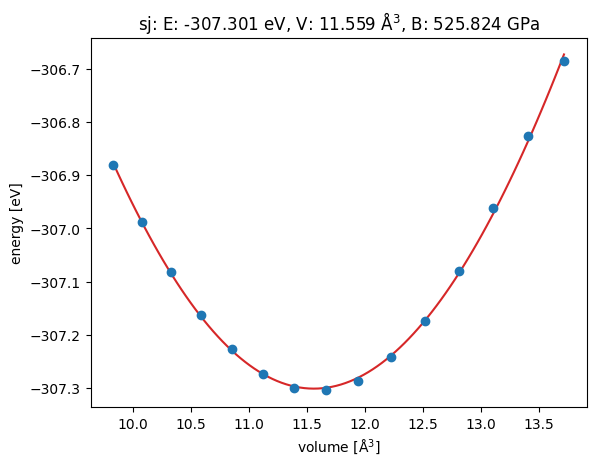

In [5]:
eos.plot()

In [6]:
atoms = Atoms(symbols=['C', 'C'],
            positions=[( 0.0000, 0.0000, 0.0000),
                       (    a/4,    a/4,    a/4)])  
atoms.set_cell([(a/2, a/2, 0), (a/2, 0, a/2), (0, a/2, a/2)])
        
atoms.calc = Fireball(fdata='HCSi', charges_method='mulliken_dipole_preserving', kpts=(4, 4, 4))
atoms.get_potential_energy()
atoms.get_charges()

print(atoms.calc.results['energy'])
print(atoms.calc.results['shell_charges'])



-307.30553596024805
[[1.23872716 2.63095475 0.13031619]
 [1.23872918 2.63095594 0.13031678]]


In [7]:
from fireballpy.bands import BandPath
bp = BandPath(atoms=atoms, path='WLGXWK', npoints=200)

<Axes: ylabel='Energy [eV]'>

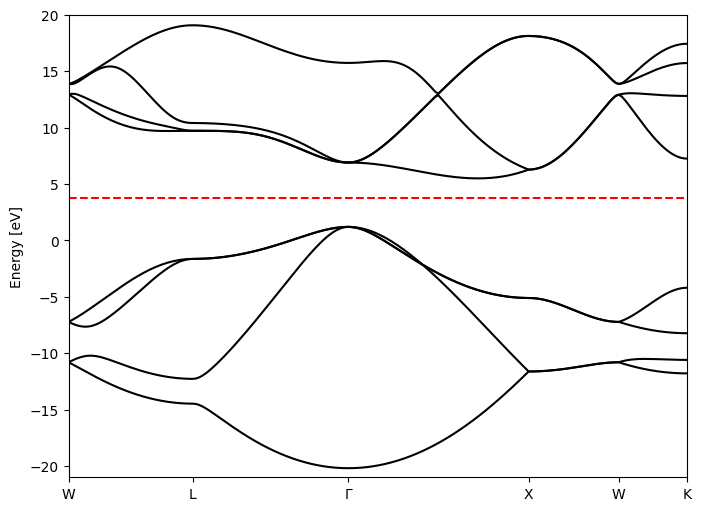

In [12]:
bp.plot(emin=-21,emax=20)